<a href="https://colab.research.google.com/github/kridtapon/GMMA-Williams-Momentum/blob/main/GMMA_Williams_Momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.6 MB/s eta 0:00:00


In [2]:
pip install --upgrade yfinance

In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Guppy MMA
def calculate_gmma(df):
    short_periods = range(1, 51)  # Updated short periods
    long_periods = range(51, 201)  # Updated long periods

    for period in short_periods:
        df[f'GMMA_Short_{period}'] = df['Close'].ewm(span=period).mean()

    for period in long_periods:
        df[f'GMMA_Long_{period}'] = df['Close'].ewm(span=period).mean()

    return df

# Function to calculate Williams %R
def calculate_williams_r(df, period=14):
    df['Williams_R'] = (df['High'].rolling(window=period).max() - df['Close']) / (df['High'].rolling(window=period).max() - df['Low'].rolling(window=period).min()) * -100
    return df

# Define the stock symbol and time period
symbol = 'AMZN'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Guppy MMA
df = calculate_gmma(df)

# Calculate Williams %R
df = calculate_williams_r(df, period=14)

# Define Entry and Exit signals
short_gmma_cols = [f'GMMA_Short_{p}' for p in range(1, 51)]  # Updated short periods
long_gmma_cols = [f'GMMA_Long_{p}' for p in range(51, 201)]   # Updated long periods

df['GMMA_Compression'] = df[short_gmma_cols].mean(axis=1) > df[long_gmma_cols].mean(axis=1)
df['Williams_R_Entry'] = df['Williams_R'] > -50
df['Williams_R_Exit'] = df['Williams_R'] < -50

df['Entry'] = df['GMMA_Compression'] & df['Williams_R_Entry']
df['Exit'] = df['GMMA_Compression'] & df['Williams_R_Exit']

# Filter data for backtesting period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-17-843e02e31e00>:15: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-17-843e02e31e00>:15: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-17-843e02e31e00>:15: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = f

Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                            193963.78539
Total Return [%]                        93.963785
Benchmark Return [%]                   131.178977
Max Gross Exposure [%]                      100.0
Total Fees Paid                      14905.383654
Max Drawdown [%]                        43.782495
Max Drawdown Duration                       835.0
Total Trades                                   50
Total Closed Trades                            50
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                 44.0
Best Trade [%]                           21.05314
Worst Trade [%]                        -18.071702
Avg Winning Trade [%]                    6.975247
Avg Losing Trade [%]                    -2.700114


[*********************100%***********************]  1 of 1 completed
<ipython-input-22-dbad6907f84a>:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-22-dbad6907f84a>:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-22-dbad6907f84a>:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = f

Best Parameters:
William Period: 12
Entry Threshold: -90
Exit Threshold: -80

Best Performance:
Total Return: 3357.868270085795%


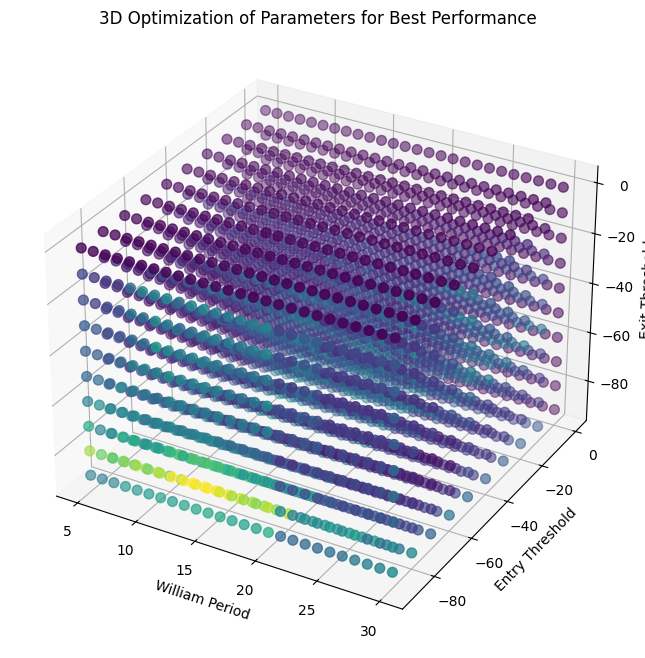

<ipython-input-22-dbad6907f84a>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-dbad6907f84a>:126: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-dbad6907f84a>:128: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-d

Start                                2020-01-01 00:00:00
End                                  2024-12-31 00:00:00
Period                                1827 days 00:00:00
Start Value                                     100000.0
End Value                                 3457868.270086
Total Return [%]                              3357.86827
Benchmark Return [%]                         2447.768145
Max Gross Exposure [%]                             100.0
Total Fees Paid                             95348.926553
Max Drawdown [%]                               60.690525
Max Drawdown Duration                  825 days 00:00:00
Total Trades                                          27
Total Closed Trades                                   26
Total Open Trades                                      1
Open Trade PnL                             361037.964379
Win Rate [%]                                        50.0
Best Trade [%]                                383.545516
Worst Trade [%]                

In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Guppy MMA
def calculate_gmma(df):
    short_periods = range(1, 51)  # Updated short periods
    long_periods = range(51, 201)  # Updated long periods

    for period in short_periods:
        df[f'GMMA_Short_{period}'] = df['Close'].ewm(span=period).mean()

    for period in long_periods:
        df[f'GMMA_Long_{period}'] = df['Close'].ewm(span=period).mean()

    return df

# Function to calculate Williams %R
def calculate_williams_r(df, period=14):
    df['Williams_R'] = (df['High'].rolling(window=period).max() - df['Close']) / (df['High'].rolling(window=period).max() - df['Low'].rolling(window=period).min()) * -100
    return df

# Define the stock symbol and time period
symbol = 'ETH-USD'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Guppy MMA
df = calculate_gmma(df)

# Define the parameter ranges for optimization
william_periods = range(5, 31)  # (5, 30)
entry_thres_range = range(-90, 1, 10)  # (-90, 0, 10)
exit_thres_range = range(-90, 1, 10)  # (-90, 0, 10)

# Generate all possible combinations of parameters
param_combinations = itertools.product(william_periods, entry_thres_range, exit_thres_range)

# Initialize lists to store performance and parameter values
performances = []
param_values = []

# Iterate over each combination of parameters
for william_period, entry_thres, exit_thres in param_combinations:
    # Calculate Williams %R with the current period
    df = calculate_williams_r(df, period=william_period)

    # Define Entry and Exit signals with current thresholds
    short_gmma_cols = [f'GMMA_Short_{p}' for p in range(1, 51)]  # Updated short periods
    long_gmma_cols = [f'GMMA_Long_{p}' for p in range(51, 201)]   # Updated long periods

    df['GMMA_Compression'] = df[short_gmma_cols].mean(axis=1) > df[long_gmma_cols].mean(axis=1)
    df['Williams_R_Entry'] = df['Williams_R'] > entry_thres
    df['Williams_R_Exit'] = df['Williams_R'] < exit_thres

    df['Entry'] = df['GMMA_Compression'] & df['Williams_R_Entry']
    df['Exit'] = df['GMMA_Compression'] & df['Williams_R_Exit']

    # Filter data for backtesting period (2020-2025)
    df_backtest = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_backtest['Close'],
        entries=df_backtest['Entry'],
        exits=df_backtest['Exit'],
        init_cash=100_000,
        fees=0.001
    )

    # Get the performance stats
    performance = portfolio.stats()

    # Store the performance and parameters
    performances.append(performance['Total Return [%]'])
    param_values.append((william_period, entry_thres, exit_thres))

# Convert performance and parameter values to numpy arrays
performances = np.array(performances)
param_values = np.array(param_values)

# Extract the individual parameters
william_periods_optimized = param_values[:, 0]
entry_thres_optimized = param_values[:, 1]
exit_thres_optimized = param_values[:, 2]

# Find the best performance and corresponding parameters
best_performance_idx = performances.argmax()
best_params = param_values[best_performance_idx]
best_performance = performances[best_performance_idx]

print("Best Parameters:")
print(f"William Period: {best_params[0]}")
print(f"Entry Threshold: {best_params[1]}")
print(f"Exit Threshold: {best_params[2]}")
print("\nBest Performance:")
print(f"Total Return: {best_performance}%")

# 3D Plot of performance based on the optimized parameters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scat = ax.scatter(william_periods_optimized, entry_thres_optimized, exit_thres_optimized, c=performances, cmap='viridis', s=50)

# Add color bar to the plot
cbar = plt.colorbar(scat)
cbar.set_label('Total Return [%]', rotation=270, labelpad=15)

ax.set_xlabel('William Period')
ax.set_ylabel('Entry Threshold')
ax.set_zlabel('Exit Threshold')
ax.set_title('3D Optimization of Parameters for Best Performance')

plt.show()

# Plot the equity curve for the best parameters
best_william_period, best_entry_thres, best_exit_thres = best_params
df = calculate_williams_r(df, period=best_william_period)

df_backtest = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

df_backtest['Williams_R_Entry'] = df['Williams_R'] > best_entry_thres
df_backtest['Williams_R_Exit'] = df['Williams_R'] < best_exit_thres

df_backtest['Entry'] = df_backtest['GMMA_Compression'] & df_backtest['Williams_R_Entry']
df_backtest['Exit'] = df_backtest['GMMA_Compression'] & df_backtest['Williams_R_Exit']

portfolio = vbt.Portfolio.from_signals(
    close=df_backtest['Close'],
    entries=df_backtest['Entry'],
    exits=df_backtest['Exit'],
    init_cash=100_000,
    fees=0.001
)

portfolio.plot().show()
print(portfolio.stats())

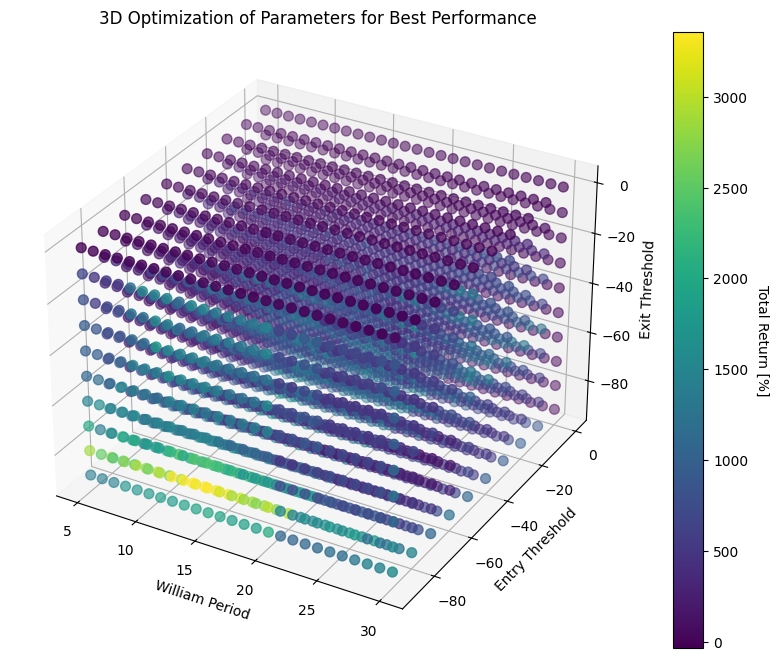

In [23]:
# 3D Plot of performance based on the optimized parameters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scat = ax.scatter(william_periods_optimized, entry_thres_optimized, exit_thres_optimized, c=performances, cmap='viridis', s=50)

# Add color bar to the plot
cbar = plt.colorbar(scat)
cbar.set_label('Total Return [%]', rotation=270, labelpad=15)

ax.set_xlabel('William Period')
ax.set_ylabel('Entry Threshold')
ax.set_zlabel('Exit Threshold')
ax.set_title('3D Optimization of Parameters for Best Performance')

plt.show()